In [1]:
#importing necessay modules
import backtrader as bt
import backtrader.indicators as btind
import backtrader.feeds as btfeeds
import datetime
import backtrader.analyzers as btanalyzers
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

In [2]:
# importing indicator classes
from src.Indicators import EMA
from src.Indicators import MAcrossover
from src.Indicators import MACD_Str
from src.Indicators import RSI
from src.Indicators import Boll_Bands

### EMA

2016-01-25 Buy (Creating a long position) at 47.26
2016-01-26 BUY EXECUTED, Price: 47.26, Cost: 4726.00, Comm 47.26
2016-01-29 Closing the long postion at 50.27
2016-02-01 SELL EXECUTED, Price: 50.08, Cost: 4726.00, Comm 50.08
2016-02-01 OPERATION PROFIT, GROSS 282.00, NET 184.66
2016-02-01 Sell (Creating a short position) at 49.92
2016-02-02 SELL EXECUTED, Price: 49.43, Cost: -4943.00, Comm 49.43
2016-02-03 Closing the short postion at 47.6
2016-02-04 BUY EXECUTED, Price: 47.54, Cost: -4943.00, Comm 47.54
2016-02-04 OPERATION PROFIT, GROSS 189.00, NET 92.03
2016-02-04 Buy (Creating a long position) at 47.45
2016-02-05 BUY EXECUTED, Price: 47.40, Cost: 4740.00, Comm 47.40
2016-02-16 Closing the long postion at 46.96
2016-02-17 SELL EXECUTED, Price: 47.32, Cost: 4740.00, Comm 47.32
2016-02-17 OPERATION PROFIT, GROSS -8.00, NET -102.72
2016-02-17 Sell (Creating a short position) at 48.18
2016-02-18 SELL EXECUTED, Price: 48.10, Cost: -4810.00, Comm 48.10
2016-02-23 Closing the short posti

2017-06-27 Closing the short postion at 65.66
2017-06-28 BUY EXECUTED, Price: 65.66, Cost: -6651.00, Comm 65.66
2017-06-28 OPERATION PROFIT, GROSS 85.00, NET -47.17
2017-06-28 Buy (Creating a long position) at 66.22
2017-06-29 BUY EXECUTED, Price: 65.82, Cost: 6582.00, Comm 65.82
2017-07-10 Closing the long postion at 66.39
2017-07-11 SELL EXECUTED, Price: 66.41, Cost: 6582.00, Comm 66.41
2017-07-11 OPERATION PROFIT, GROSS 59.00, NET -73.23
2017-07-11 Sell (Creating a short position) at 66.4
2017-07-12 SELL EXECUTED, Price: 67.06, Cost: -6706.00, Comm 67.06
2017-07-31 Closing the short postion at 68.97
2017-08-01 BUY EXECUTED, Price: 69.35, Cost: -6706.00, Comm 69.35
2017-08-01 OPERATION PROFIT, GROSS -229.00, NET -365.41
2017-08-01 Buy (Creating a long position) at 68.85
2017-08-02 BUY EXECUTED, Price: 68.83, Cost: 6883.00, Comm 68.83
2017-08-04 Closing the long postion at 68.95
2017-08-07 SELL EXECUTED, Price: 69.06, Cost: 6883.00, Comm 69.06
2017-08-07 OPERATION PROFIT, GROSS 23.00,

2018-12-12 SELL EXECUTED, Price: 108.13, Cost: 10707.00, Comm 108.13
2018-12-12 OPERATION PROFIT, GROSS 106.00, NET -109.20
2018-12-12 Sell (Creating a short position) at 106.36
2018-12-13 SELL EXECUTED, Price: 106.85, Cost: -10685.00, Comm 106.85
2018-12-14 Closing the short postion at 103.39
2018-12-17 BUY EXECUTED, Price: 102.79, Cost: -10685.00, Comm 102.79
2018-12-17 OPERATION PROFIT, GROSS 406.00, NET 196.36
2018-12-17 Buy (Creating a long position) at 100.33
2018-12-18 BUY EXECUTED, Price: 101.17, Cost: 10117.00, Comm 101.17
2019-01-04 Closing the long postion at 99.39
2019-01-07 SELL EXECUTED, Price: 99.11, Cost: 10117.00, Comm 99.11
2019-01-07 OPERATION PROFIT, GROSS -206.00, NET -406.28
2019-01-07 Sell (Creating a short position) at 99.52
2019-01-08 SELL EXECUTED, Price: 100.47, Cost: -10047.00, Comm 100.47
2019-01-14 Closing the short postion at 99.51
2019-01-15 BUY EXECUTED, Price: 99.96, Cost: -10047.00, Comm 99.96
2019-01-15 OPERATION PROFIT, GROSS 51.00, NET -149.43
2019

<IPython.core.display.Javascript object>


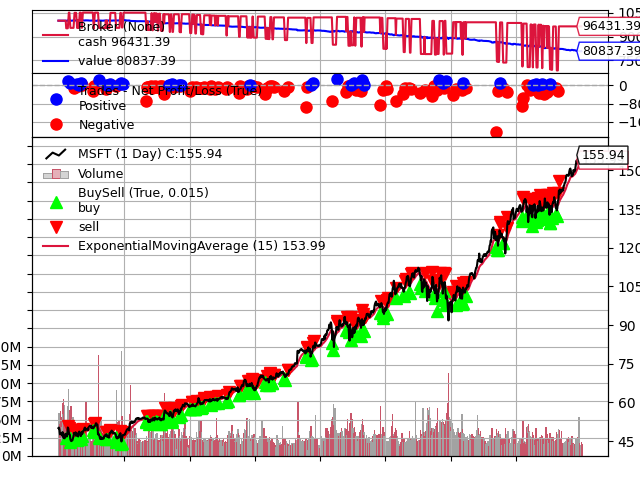

<IPython.core.display.Javascript object>


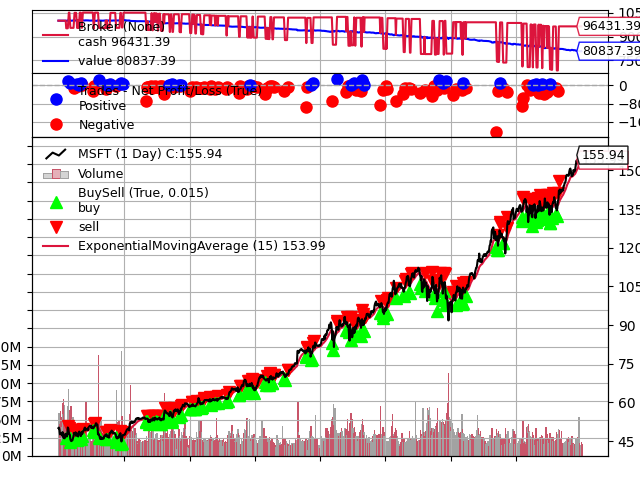

[[<Figure size 640x480 with 4 Axes>]]

In [3]:
# Instantiating the cerebro engine
cerebro = bt.Cerebro()
#Set data parameters and add to Cerebro
data = bt.feeds.YahooFinanceData(
        dataname = 'MSFT',
        fromdate=datetime.datetime(2016, 1, 1),
        todate=datetime.datetime(2019, 12, 31),
        reverse=False
)
#Add data
cerebro.adddata(data)
#Add strategy
cerebro.addstrategy(EMA)
#fix the size(numner of stocks you will buy at a time)
cerebro.addsizer(bt.sizers.SizerFix, stake=100)
#initial investment
cerebro.broker.setcash(100000.0)  
#some money for the broker
cerebro.broker.setcommission(commission=0.01)
start_portfolio_value = cerebro.broker.getvalue()
#Adding an analyser
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')
# Running the cerbro engine and storing the result
results = cerebro.run()
end_portfolio_value = cerebro.broker.getvalue()
print("\nStarting portfolio value: %s \nEnding portfolio value: %s \n\nProfit/Loss: %s \nSharpe Ratio: %s\n" \
      %(start_portfolio_value,end_portfolio_value,end_portfolio_value-start_portfolio_value, \
        results[0].analyzers.mysharpe.get_analysis()['sharperatio']))
cerebro.plot()
cerebro.plot()

## Moving Average Crossover

2016-04-29, Sell (Creating a short position) at 45.83
2016-05-02, SELL EXECUTED, Price: 45.95, Cost: -4595.00, Comm 45.95
2016-07-13, Closing the short postion at 49.52
2016-07-14, BUY EXECUTED, Price: 49.83, Cost: -4595.00, Comm 49.83
2016-07-14, OPERATION PROFIT, GROSS -388.00, NET -483.78
2018-10-24, Sell (Creating a short position) at 99.34
2018-10-25, SELL EXECUTED, Price: 103.45, Cost: -10345.00, Comm 103.45
2018-12-06, Closing the short postion at 106.47
2018-12-07, BUY EXECUTED, Price: 105.68, Cost: -10345.00, Comm 105.68
2018-12-07, OPERATION PROFIT, GROSS -223.00, NET -432.13
2018-12-07, Sell (Creating a short position) at 102.21
2018-12-10, SELL EXECUTED, Price: 102.19, Cost: -10219.00, Comm 102.19
2018-12-12, Closing the short postion at 106.36
2018-12-13, BUY EXECUTED, Price: 106.85, Cost: -10219.00, Comm 106.85
2018-12-13, OPERATION PROFIT, GROSS -466.00, NET -675.04
2018-12-14, Sell (Creating a short position) at 103.39
2018-12-17, SELL EXECUTED, Price: 102.79, Cost: -10

<IPython.core.display.Javascript object>


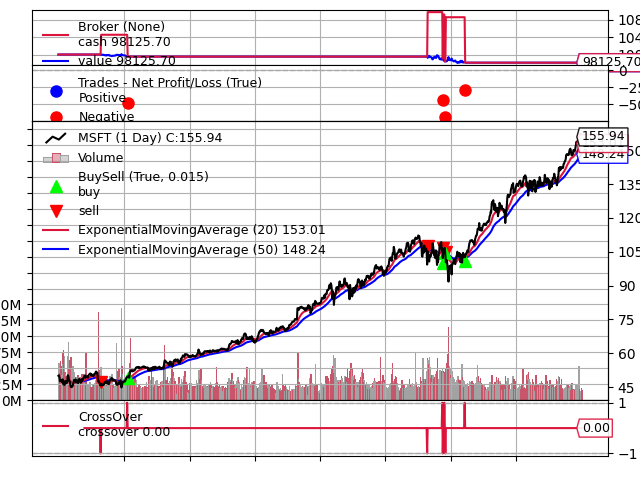

[[<Figure size 640x480 with 5 Axes>]]

In [4]:
cerebro = bt.Cerebro()
data = bt.feeds.YahooFinanceData(
        dataname = 'MSFT',
        fromdate=datetime.datetime(2016, 1, 1),
        todate=datetime.datetime(2019, 12, 31),
        reverse=False
)
cerebro.adddata(data)
cerebro.addstrategy(MAcrossover)
cerebro.addsizer(bt.sizers.SizerFix, stake=100)
cerebro.broker.setcash(100000.0) 
cerebro.broker.setcommission(commission=0.01)
start_portfolio_value = cerebro.broker.getvalue()
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')
results = cerebro.run()
end_portfolio_value = cerebro.broker.getvalue()
print("\nStarting portfolio value: %s \nEnding portfolio value: %s \n\nProfit/Loss: %s \nSharpe Ratio: %s\n" \
      %(start_portfolio_value,end_portfolio_value,end_portfolio_value-start_portfolio_value, \
        results[0].analyzers.mysharpe.get_analysis()['sharperatio']))
cerebro.plot()

### MACD

2016-04-07 Sell (Creating a long position) at 50.05
2016-04-08 SELL EXECUTED, Price: 50.25, Cost: -5025.00, Comm 50.25
2016-04-18 Closing the short postion at 51.89
2016-04-19 BUY EXECUTED, Price: 52.05, Cost: -5025.00, Comm 52.05
2016-04-19 OPERATION PROFIT, GROSS -180.00, NET -282.30
2016-04-22 Sell (Creating a long position) at 47.59
2016-04-25 SELL EXECUTED, Price: 47.59, Cost: -4759.00, Comm 47.59
2016-05-12 Closing the short postion at 47.34
2016-05-13 BUY EXECUTED, Price: 47.28, Cost: -4759.00, Comm 47.28
2016-05-13 OPERATION PROFIT, GROSS 31.00, NET -63.87
2016-06-13 Sell (Creating a long position) at 46.41
2016-06-14 SELL EXECUTED, Price: 46.18, Cost: -4618.00, Comm 46.18
2016-06-23 Closing the short postion at 48.04
2016-06-24 BUY EXECUTED, Price: 46.10, Cost: -4618.00, Comm 46.10
2016-06-24 OPERATION PROFIT, GROSS 8.00, NET -84.28
2016-06-24 Sell (Creating a long position) at 46.12
2016-06-27 SELL EXECUTED, Price: 45.44, Cost: -4544.00, Comm 45.44
2016-06-30 Closing the shor

2019-01-07 Closing the short postion at 99.52
2019-01-08 BUY EXECUTED, Price: 100.47, Cost: -10279.00, Comm 100.47
2019-01-08 OPERATION PROFIT, GROSS 232.00, NET 28.74
2019-02-01 Sell (Creating a long position) at 100.22
2019-02-04 SELL EXECUTED, Price: 100.31, Cost: -10031.00, Comm 100.31
2019-02-05 Closing the short postion at 104.55
2019-02-06 BUY EXECUTED, Price: 104.34, Cost: -10031.00, Comm 104.34
2019-02-06 OPERATION PROFIT, GROSS -403.00, NET -607.65
2019-02-11 Sell (Creating a long position) at 102.63
2019-02-12 SELL EXECUTED, Price: 103.50, Cost: -10350.00, Comm 103.50
2019-02-12 Closing the short postion at 104.23
2019-02-13 BUY EXECUTED, Price: 104.82, Cost: -10350.00, Comm 104.82
2019-02-13 OPERATION PROFIT, GROSS -132.00, NET -340.32
2019-03-08 Sell (Creating a long position) at 108.22
2019-03-11 SELL EXECUTED, Price: 108.69, Cost: -10869.00, Comm 108.69
2019-03-12 Closing the short postion at 111.26
2019-03-13 BUY EXECUTED, Price: 111.76, Cost: -10869.00, Comm 111.76
201

<IPython.core.display.Javascript object>


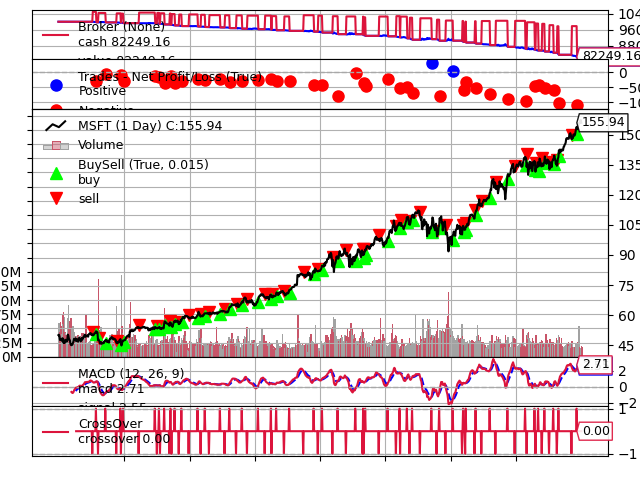

[[<Figure size 640x480 with 6 Axes>]]

In [5]:
cerebro = bt.Cerebro()
data = bt.feeds.YahooFinanceData(
        dataname = 'MSFT',
        fromdate=datetime.datetime(2016, 1, 1),
        todate=datetime.datetime(2019, 12, 31),
        reverse=False
)
cerebro.adddata(data)
cerebro.addstrategy(MACD_Str)
cerebro.addsizer(bt.sizers.SizerFix, stake=100)
cerebro.broker.setcash(100000.0) 
cerebro.broker.setcommission(commission=0.01)
start_portfolio_value = cerebro.broker.getvalue()
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')
results = cerebro.run()
end_portfolio_value = cerebro.broker.getvalue()
print("\nStarting portfolio value: %s \nEnding portfolio value: %s \n\nProfit/Loss: %s \nSharpe Ratio: %s\n" \
      %(start_portfolio_value,end_portfolio_value,end_portfolio_value-start_portfolio_value, \
        results[0].analyzers.mysharpe.get_analysis()['sharperatio']))
cerebro.plot()

### RSI

2016-04-28 Buy (Creating a long position) at 45.86
2016-04-29 BUY EXECUTED, Price: 45.36, Cost: 4536.00, Comm 45.36
2016-07-20 Closing the long position at 51.75
2016-07-21 SELL EXECUTED, Price: 51.81, Cost: 4536.00, Comm 51.81
2016-07-21 OPERATION PROFIT, GROSS 645.00, NET 547.83
2016-07-21 Sell (Creating a short position) at 51.64
2016-07-22 SELL EXECUTED, Price: 51.90, Cost: -5190.00, Comm 51.90
2018-12-24 Closing the short postion at 91.79
2018-12-26 BUY EXECUTED, Price: 92.77, Cost: -5190.00, Comm 92.77
2018-12-26 OPERATION PROFIT, GROSS -4087.00, NET -4231.67
2019-03-15 Sell (Creating a short position) at 113.51
2019-03-18 SELL EXECUTED, Price: 113.76, Cost: -11376.00, Comm 113.76

Starting portfolio value: 100000.0 
Ending portfolio value: 91984.40000000001 

Profit/Loss: -8015.599999999991 
Sharpe Ratio: -1.8879221159835835



<IPython.core.display.Javascript object>


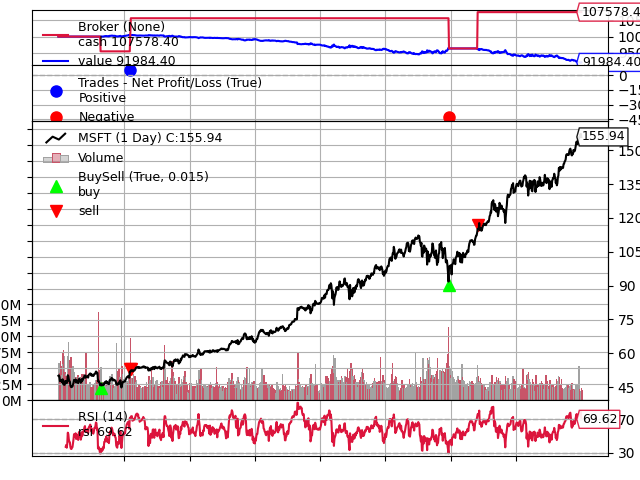

[[<Figure size 640x480 with 5 Axes>]]

In [6]:
cerebro = bt.Cerebro()
data = bt.feeds.YahooFinanceData(
        dataname = 'MSFT',
        fromdate=datetime.datetime(2016, 1, 1),
        todate=datetime.datetime(2019, 12, 31),
        reverse=False
)
cerebro.adddata(data)
cerebro.addstrategy(RSI)
cerebro.addsizer(bt.sizers.SizerFix, stake=100)
cerebro.broker.setcash(100000.0) 
cerebro.broker.setcommission(commission=0.01)
start_portfolio_value = cerebro.broker.getvalue()
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')
results = cerebro.run()
end_portfolio_value = cerebro.broker.getvalue()
print("\nStarting portfolio value: %s \nEnding portfolio value: %s \n\nProfit/Loss: %s \nSharpe Ratio: %s\n" \
      %(start_portfolio_value,end_portfolio_value,end_portfolio_value-start_portfolio_value, \
        results[0].analyzers.mysharpe.get_analysis()['sharperatio']))
cerebro.plot()

### Bollinger Bands

2016-10-21 Sell (Creating a short position) at 55.56
2016-10-24 SELL EXECUTED, Price: 55.82, Cost: -5582.00, Comm 55.82
2016-11-14 Closing the short postion at 54.13
2016-11-15 BUY EXECUTED, Price: 54.69, Cost: -5582.00, Comm 54.69
2016-11-15 OPERATION PROFIT, GROSS 113.00, NET 2.49
2017-01-27 Sell (Creating a short position) at 61.67
2017-01-30 SELL EXECUTED, Price: 61.59, Cost: -6159.00, Comm 61.59
2017-02-02 Closing the short postion at 59.23
2017-02-03 BUY EXECUTED, Price: 59.54, Cost: -6159.00, Comm 59.54
2017-02-03 OPERATION PROFIT, GROSS 205.00, NET 83.87
2017-04-24 Sell (Creating a short position) at 63.7
2017-04-25 SELL EXECUTED, Price: 64.05, Cost: -6405.00, Comm 64.05
2017-06-27 Closing the short postion at 65.66
2017-06-28 BUY EXECUTED, Price: 65.66, Cost: -6405.00, Comm 65.66
2017-06-28 OPERATION PROFIT, GROSS -161.00, NET -290.71
2017-10-27 Sell (Creating a short position) at 79.93
2017-10-30 SELL EXECUTED, Price: 79.83, Cost: -7983.00, Comm 79.83
2017-12-04 Closing the s

<IPython.core.display.Javascript object>


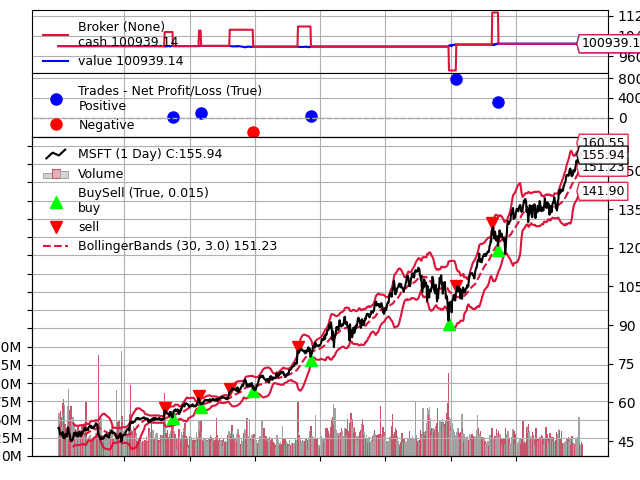

[[<Figure size 640x480 with 4 Axes>]]

In [7]:
cerebro = bt.Cerebro()
data = bt.feeds.YahooFinanceData(
        dataname = 'MSFT',
        fromdate=datetime.datetime(2016, 1, 1),
        todate=datetime.datetime(2019, 12, 31),
        reverse=False
)
cerebro.adddata(data)
cerebro.addstrategy(Boll_Bands)
cerebro.addsizer(bt.sizers.SizerFix, stake=100)
cerebro.broker.setcash(100000.0) 
cerebro.broker.setcommission(commission=0.01)
start_portfolio_value = cerebro.broker.getvalue()
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')
results = cerebro.run()
end_portfolio_value = cerebro.broker.getvalue()
print("\nStarting portfolio value: %s \nEnding portfolio value: %s \n\nProfit/Loss: %s \nSharpe Ratio: %s\n" \
      %(start_portfolio_value,end_portfolio_value,end_portfolio_value-start_portfolio_value, \
        results[0].analyzers.mysharpe.get_analysis()['sharperatio']))
cerebro.plot()